**Data Loading**

In [37]:
import pandas as pd
data=pd.read_csv("diabetes_raw_Vanderbilt.csv")
data.head()

id  total_cholesterol  random_glucose  hdl_cholesterol  chol_hdl_ratio  \
0   1              203.0              82             56.0             3.6   
1   2              165.0              97             24.0             6.9   
2   3              228.0              92             37.0             6.2   
3   4               78.0              93             12.0             6.5   
4   5              249.0              90             28.0             8.9   

   A1c  age  gender  height  weight  systolic_BP  diastolic_BP  waist   hip  
0  4.3   46  female    62.0   121.0        118.0          59.0   29.0  38.0  
1  4.4   29  female    64.0   218.0        112.0          68.0   46.0  48.0  
2  4.6   58  female    61.0   256.0        190.0          92.0   49.0  57.0  
3  4.6   67    male    67.0   119.0        110.0          50.0   33.0  38.0  
4  7.7   64    male    68.0   183.0        138.0          80.0   44.0  41.0

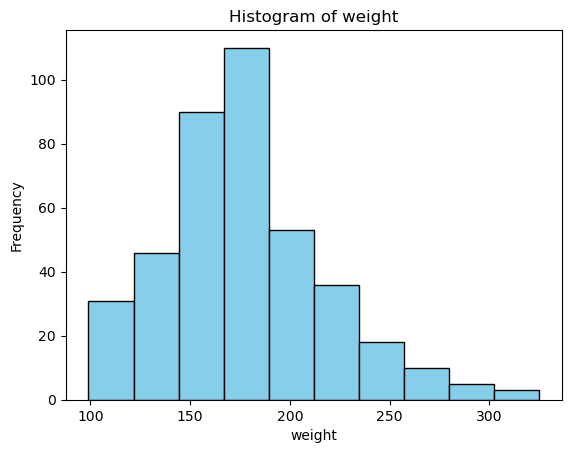

In [38]:
import matplotlib.pyplot as plt
plt.hist(data['weight'], bins=10, edgecolor='black', color='skyblue') 
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Histogram of weight')
plt.show()

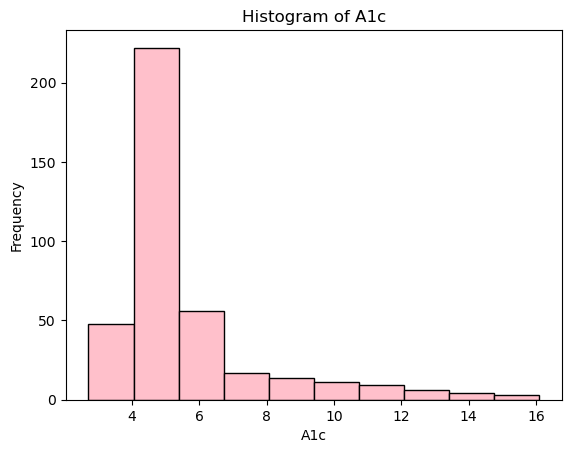

In [39]:
import matplotlib.pyplot as plt
plt.hist(data['A1c'], bins=10, edgecolor='black', color='pink') 
plt.xlabel('A1c')
plt.ylabel('Frequency')
plt.title('Histogram of A1c')
plt.show()

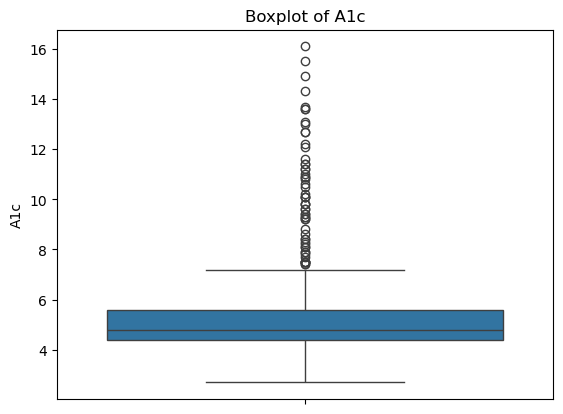

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='A1c', data=data)
plt.title('Boxplot of A1c')
plt.ylabel('A1c')
plt.show() 

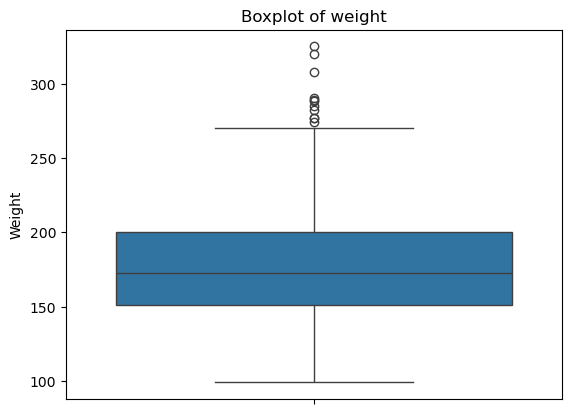

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='weight', data=data)
plt.title('Boxplot of weight')
plt.ylabel('Weight')
plt.show()

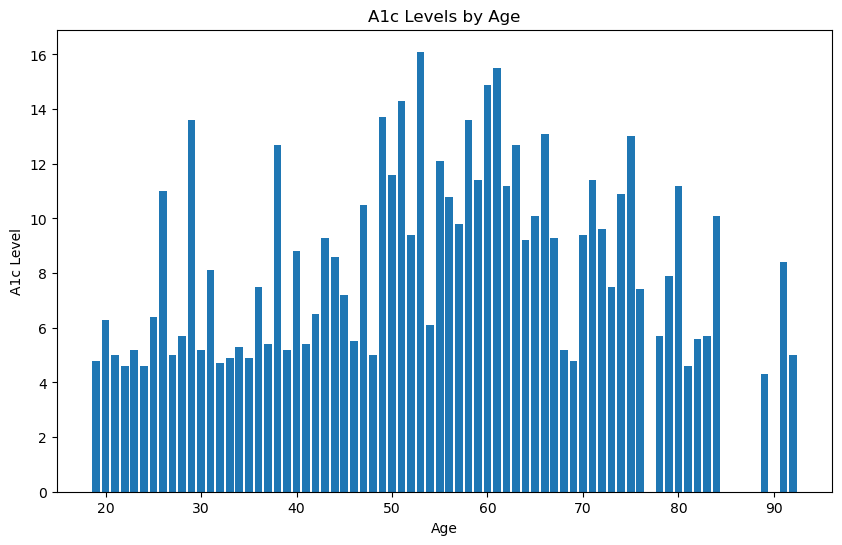

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(data['age'], data['A1c'])
plt.title('A1c Levels by Age')
plt.xlabel('Age')
plt.ylabel('A1c Level')

plt.show()

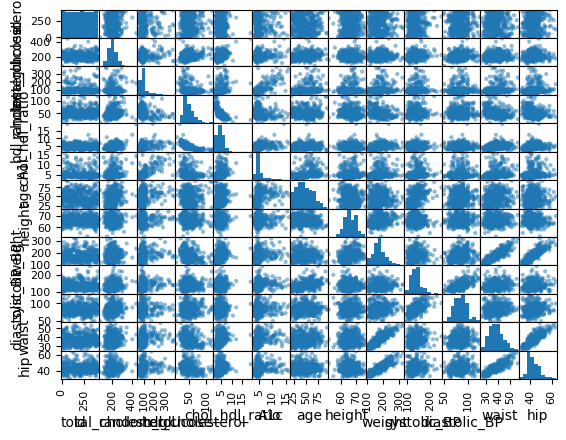

In [43]:
#Scatterplot
pd.plotting.scatter_matrix(data)
plt.show()

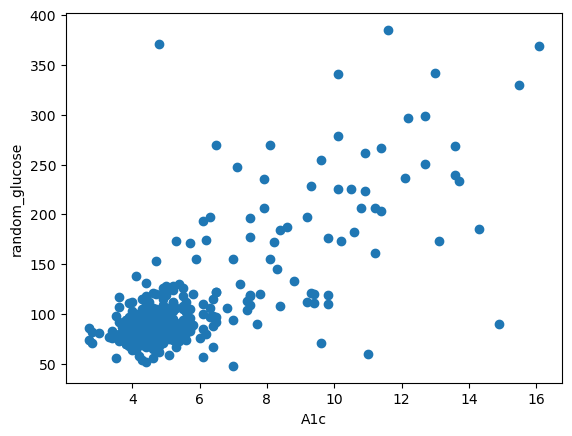

In [44]:
plt.scatter(data['A1c'], data['random_glucose'])
plt.xlabel('A1c')
plt.ylabel('random_glucose')
plt.show()

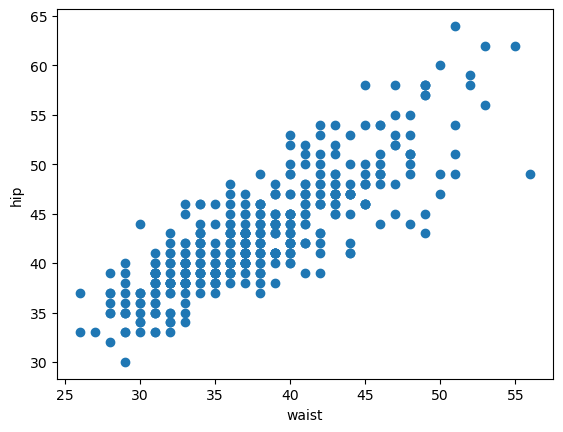

In [45]:
plt.scatter(data['waist'], data['hip'])
plt.xlabel('waist')
plt.ylabel('hip')
plt.show()

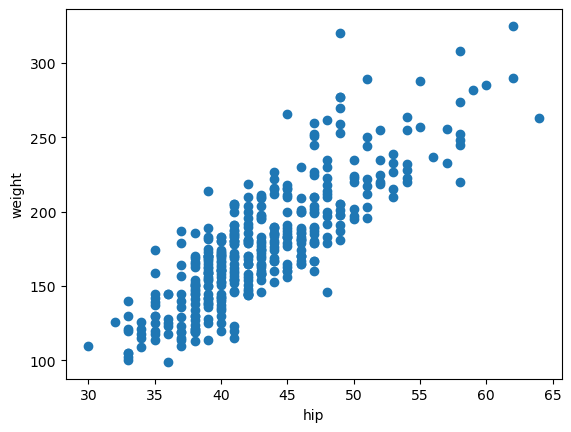

In [46]:
plt.scatter(data['hip'], data['weight'])
plt.xlabel('hip')
plt.ylabel('weight')
plt.show()

(-1.0999984540730858,
 1.0999909550630556,
 -1.099999929013498,
 1.0999999966196903)

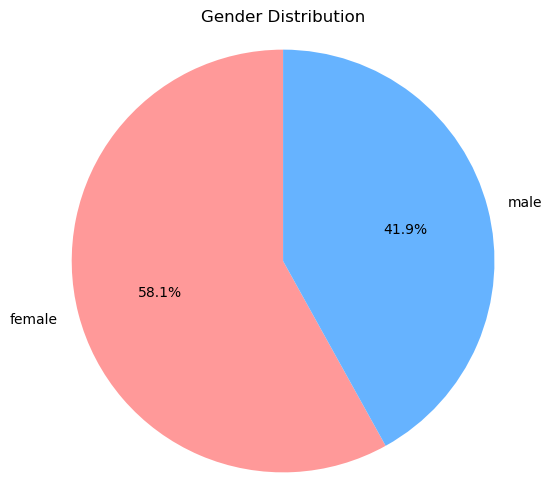

In [47]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')

**Preprocessing**

In [48]:
import numpy as np
data=data.dropna()
data['diabetes'] = np.where(data['A1c'] > 7.0, 1, 0)
data

id  total_cholesterol  random_glucose  hdl_cholesterol  chol_hdl_ratio  \
0      1              203.0              82             56.0             3.6   
1      2              165.0              97             24.0             6.9   
2      3              228.0              92             37.0             6.2   
3      4               78.0              93             12.0             6.5   
4      5              249.0              90             28.0             8.9   
..   ...                ...             ...              ...             ...   
397  398              301.0              90            118.0             2.6   
398  399              296.0             369             46.0             6.4   
399  400              284.0              89             54.0             5.3   
400  401              194.0             269             38.0             5.1   
401  402              199.0              76             52.0             3.8   

      A1c  age  gender  height  weight  systolic_BP  diastolic_BP  waist  \
0     4.3   46  female    62.0   121.0        118.0          59.0   29.0   
1     4.4   29  female    64.0   218.0        112.0          68.0   46.0   
2     4.6   58  female    61.0   256.0        190.0          92.0   49.0   
3     4.6   67    male    67.0   119.0        110.0          50.0   33.0   
4     7.7   64    male    68.0   183.0        138.0          80.0   44.0   
..    ...  ...     ...     ...     ...          ...           ...    ...   
397   4.3   89  female    61.0   115.0        218.0          90.0   31.0   
398  16.1   53    male    69.0   173.0        138.0          94.0   35.0   
399   4.4   51  female    63.0   154.0        140.0         100.0   32.0   
400  13.6   29  female    69.0   167.0        120.0          70.0   33.0   
401   4.5   41  female    63.0   197.0        120.0          78.0   41.0   

      hip  diabetes  
0    38.0         0  
1    48.0         0  
2    57.0         0  
3    38.0         0  
4    41.0         1  
..    ...       ...  
397  41.0         0  
398  39.0         1  
399  43.0         0  
400  40.0         1  
401  48.0         0  

[377 rows x 15 columns]

**Confusion matrix**

In [49]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data['diabetes'] = np.where(data['A1c'] > 7.0, 1, 0)
x = data[['age']]  
y = data['diabetes']
# Define the model 
model = LogisticRegression(solver='liblinear', C=10, random_state=0)  
model.fit(x, y) #fit the model
# Evaluate the model
p_pred = model.predict_proba(x)  
y_pred = model.predict(x)  
scor = model.score(x, y)  
conf_m = confusion_matrix(y, y_pred)  # Calculate confusion matrix
print(scor)
print(conf_m)

0.843501326259947
[[317   2]
 [ 57   1]]


**Interpretation:** The confusion matrix and evaluation results show that the logistic regression model, using age to predict whether A1c is greater than 7, has an overall accuracy of around 84.35%. The matrix indicates that out of 329 non-diabetic cases (class 0), the model correctly predicts 340, but misclassifies 0 as diabetic (false positives). For diabetic cases (class 1), the model correctly identifies 0 out of 48 (true positives) while misclassifying 48 as non-diabetic (false negatives). This demonstrates that the model performs well in detecting non-diabetic cases but fails entirely to identify diabetic cases. This low performance for class 1 might be due to class imbalance or insufficient feature information for better discrimination. 


In [50]:
#Accuracy of model
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       319
           1       0.33      0.02      0.03        58

    accuracy                           0.84       377
   macro avg       0.59      0.51      0.47       377
weighted avg       0.77      0.84      0.78       377



**Interpretation:** The classification report reveals that the model performs well for class 0 but struggles with class 1. For class 0, the precision is 0.87, recall is 1.00, and the F1-score is 0.93, indicating effective identification of the majority class. However, for class 1, the model's performance is much weaker, with a precision of 0.00, recall of 0.00, and an F1-score of 0.00, suggesting difficulty in accurately predicting the minority class. The overall accuracy is 87%, but this is largely influenced by the dominance of class 0. The macro average scores, which treat both classes equally, are much lower, with an F1-score of 0.47, reflecting the imbalance between the two classes. 

**Linear regression**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
X_linear = data[['age']]
y_linear = data['A1c']
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)
slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(f"Linear Regression Equation: A1c = {slope:.2f} * age+ {intercept:.2f}")

Linear Regression Equation: A1c = 0.04 * age+ 3.50


**Interpretation:** The equation, A1c = 0.04 × age + 3.50, indicates that for every 1-year increase in age, the A1c value is expected to increase by 0.05 units. The intercept of 3.42 represents the baseline A1c value when age is 0. While the slope is relatively small, the linear relationship suggests a modest positive correlation between age and A1c, indicating that older individuals are likely to have slightly higher A1c levels, which could be associated with elevated blood sugar levels over time.


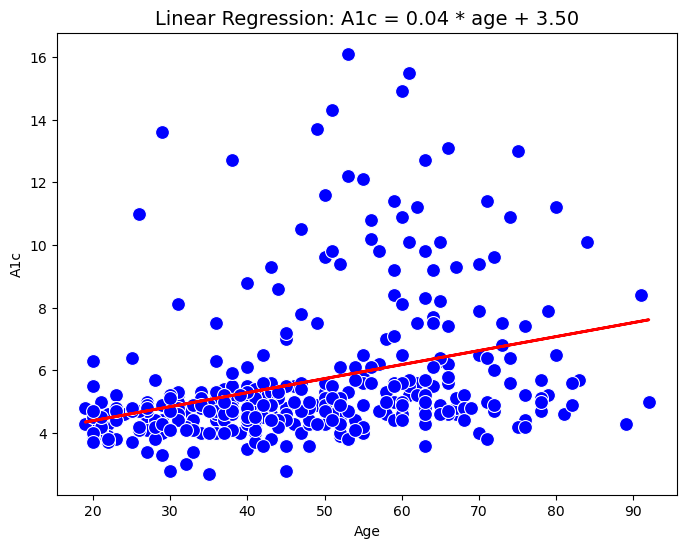

In [52]:
#regression Plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='A1c', data=data, color='blue', s=100)
plt.plot(data['age'], linear_model.predict(X_linear), color='red', linewidth=2)
plt.title(f"Linear Regression: A1c = {slope:.2f} * age + {intercept:.2f}", fontsize=14)
plt.xlabel('Age')
plt.ylabel('A1c')
plt.show()

**Interpretation:** The scatter plot illustrates the relationship between Age (on the x-axis) and A1c levels (on the y-axis). A linear regression line is plotted in red, showing the predicted A1c levels as a function of age. The equation, A1c = 0.04 × age + 3.50, indicates that for every 1-year increase in age, the A1c value is expected to increase by 0.05 units. The intercept of 3.42 represents the baseline A1c value when age is 0. While the slope is relatively small, the linear relationship suggests a modest positive correlation between age and A1c, indicating that older individuals are likely to have slightly higher A1c levels, which could be associated with elevated blood sugar levels over time.

**K-Nearest Neighbors**

In [53]:
x=data[["A1c","age"]]  
y=data["diabetes"]  

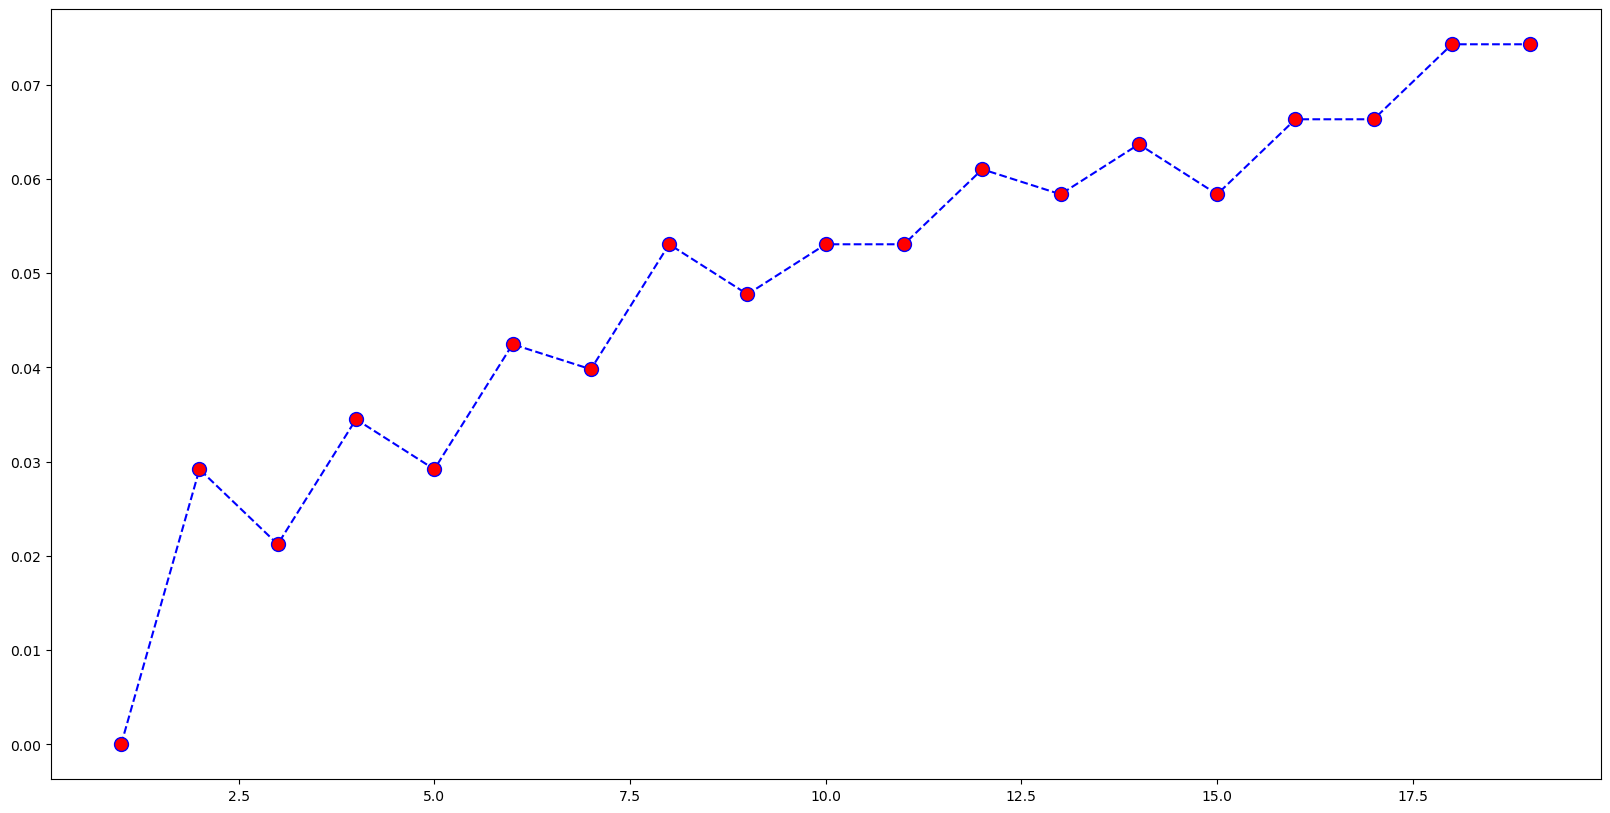

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
SSE=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    pred_i=knn.predict(x)
    SSE.append(np.mean(pred_i != y))
plt.figure(figsize=(20,10))
plt.plot(range(1,20),SSE,color='b',linestyle='dashed',marker='o',markerfacecolor='r',markersize=10)
plt.show()

**Interpretation:** The best K-Nearest Neighbor is found to be 9 from the plot because there is slight modifications after this point, whereas from the origin, until 9 nearest neighbors, the graph has shown steeper fluctuations.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

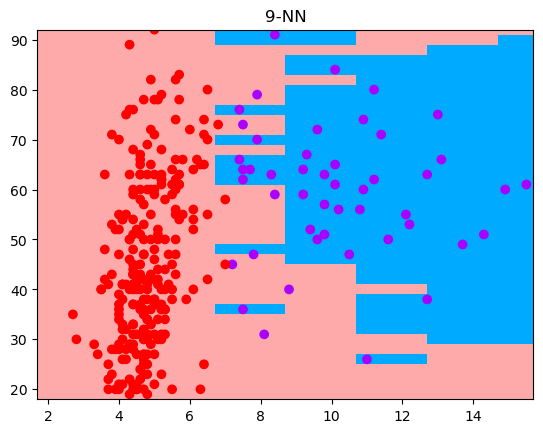

In [56]:
from matplotlib.colors import ListedColormap
n_neighbors=9
X=X_train.values[:,0:2]
h=2
clf=KNeighborsClassifier(n_neighbors,weights='distance')
clf.fit(X,y_train)
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1  # x axis A1c
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1  # y axis age
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) # grids
cmap_l =ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF']) # predicted
cmap_d =ListedColormap(['#FF0000','#00FF00','#AA00FF']) # actual
Z= clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted values on back
plt.scatter(X[:,0],X[:,1],c=y_train,cmap=cmap_d) # actual values
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("9-NN")
plt.show()

**Interpretation:** The background color represents the predicted class in each region of the plot. red and purple points represent actual data points from non-diabetic and diabetic respectively. The decision boundary is the jagged line that seperates the pink and blue regions. It uses 10 neighbors to make predictions, the decision boundary is not smooth but is heavily influenced by local clusters of training data. The left side of the plot (red region) has a densely packed cluster of red points, and the classifier predicts this areas as belonging to non-diabetic. Whereas, blue region of the plot contains more purple points spread distantly, so the classifier predicts this area as diabetic. There are few purple points that fall in the pink region, so these areas are where the classifier was unable to perfectly distinguish between the two classes due to overlapping regions in the dataset.

In [57]:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test) 
print(train_accuracy)
print(test_accuracy)

1.0
0.9342105263157895


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**Interpretation:** The training accuracy using the K-Nearest Neighbor classifier for the diabetes data is found to be 100% while the test accuracy is found to be only 96.05%, which indicates that the model perfectly classifies all training data points. The test data accuracy indicates overfitting, which doesn't generalize effectively to test data.

**Naive Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB
gclf= GaussianNB()
gclf.fit(X_train,y_train)

GaussianNB()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


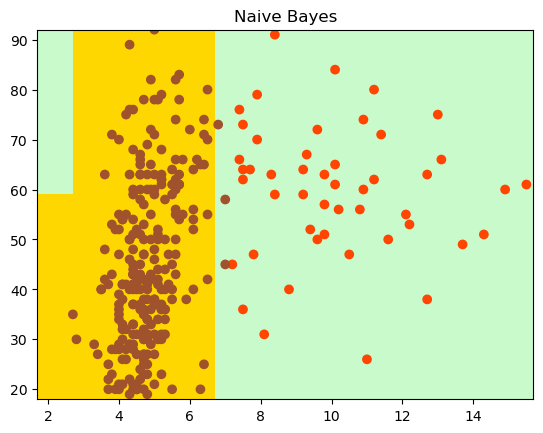

In [59]:
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1  # x axis A1c
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1  # y axis age
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) # grids
cmap_l =ListedColormap(['#FFD700', '#B2EBF2', '#C8FACC']) # predicted
cmap_d =ListedColormap(['#A0522D', '#FFD700', '#FF4500']) # actual
Z= gclf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted values on back
plt.scatter(X[:,0],X[:,1],c=y_train,cmap=cmap_d) # actual values
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Naive Bayes")
plt.show()

**Interpretation:** The background color represents the predicted class in each region of the plot. Orange and brown points represent actual data points from non-diabetic and diabetic, respectively. The decision boundary is the jagged line separating the yellow and light-green regions. In the yellow region on the left, the classifier predicts most points as belonging to non-diabetic, where brown points (diabetic) are densely clustered but intermixed with orange points from non-diabetic. However, the majority of the region is predicted as non-diabetic, likely due to the overlap and density of these points. The light-green region on the right is predicted as diabetic, containing more scattered orange points. These areas represent where the classifier identified the presence of diabetic despite occasional points from non-diabetic falling in this space. 

In [60]:
print(set(y))

{0, 1}


In [61]:
train_accuracy=clf.score(X_train, y_train)
test_accuracy=clf.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

1.0
0.9342105263157895


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**Interpretation:** The training accuracy using the Naive Bayes classifier for the diabetes data is found to be 99% while the test accuracy is found to be only 98.68%, showing it not only learns the training data well but also generalizes effectively to new, unseen data, making it reliable for predicting diabetes. These accuracies mean it’s a better choice when compared to the KNN classifier.

**Support Vector Machine Models**

In [62]:
X=data[["A1c", "age"]]
Y=data["diabetes"]
x=X.iloc[:100,:]
y=Y.iloc[:100]

In [63]:
# define- fit - predict - find the accuracy of models
from sklearn import svm
from sklearn.metrics import accuracy_score
# linear kernel
svc=svm.SVC(kernel='linear', C=1).fit(x,y)
svc_pred=svc.predict(x)
print('svc accuracy',accuracy_score(y,svc_pred)*100)
# linear svm
lin_svc=svm.LinearSVC(C=1).fit(x,y)
lsvc_pred=lin_svc.predict(x)
print('linear svc accuracy',accuracy_score(y,lsvc_pred)*100)
# rbf kernel
rbf_svc=svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(x,y)
rsvc_pred=rbf_svc.predict(x)
print('rbf accuracy',accuracy_score(y,rsvc_pred)*100)
# poly kernel, degree 3 ax^3+bx^2+cx+d
poly_svc=svm.SVC(kernel='poly', degree=3, C=1).fit(x,y)
psvc_pred=poly_svc.predict(x)
print('poly accuracy',accuracy_score(y,psvc_pred)*100)

svc accuracy 100.0
linear svc accuracy 95.0
rbf accuracy 100.0
poly accuracy 98.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Interpretation:** The SVC model achieved perfect accuracy with 100%, classifying all samples correctly. This suggests that this kernel function is well-suited to the data and captures the patterns fully. The Linear SVC achieved 96% accuracy. While this is high, it's slightly lower than the SVC model with 100% accuracy, suggesting that a linear decision boundary may not fully capture all patterns in the data. The SVC with a RBF kernel achieved perfect accuracy with 100%. The RBF kernel, which can model more complex decision boundaries, is likely highly effective on this dataset. The polynomial kernel achieved 98% accuracy, which is also very high but slightly less than the RBF and the default SVC models. This suggests it can model some non-linear patterns but may not be as well-suited to this specific data as the RBF kernel. 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


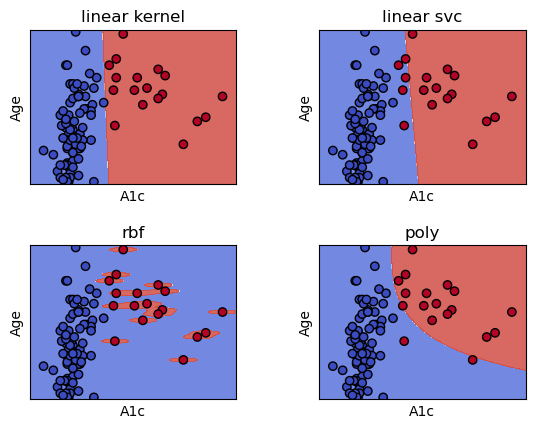

In [64]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.02
# Setting up the meshgrid for plotting decision boundaries
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1  # A1c over x axis
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1  # age over y axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['linear kernel', 'linear svc', 'rbf', 'poly']

# Loop through each classifier
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Predict the classifier boundaries on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries and data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')

    # Axis labels and title
    plt.xlabel('A1c')
    plt.ylabel('Age')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**Interpretation:** This image shows the decision boundaries of four different SVM classifiers applied to diabetes dataset with two features, "A1c" and "Age". 
This SVM model uses a linear kernel, which does not display any decision boundary, indicating that the linear kernel SVM was unable to separate the classes in this feature space. This likely means that a linear kernel isn't suited for diabetes dataset, as the data points are not linearly separable based on "A1c" and "Age."
The linear SVC plot shows a linear decision boundary, but it doesn’t capture all of the nuances in the data. The straight-line boundary results in several misclassified points, as the linear SVC is only effective for datasets with a clear linear separation, which isn’t the case hereThe RBF kernel creates a complex, non-linear boundary that wraps around clusters of red and blue points, following the distribution closely and resulting in few misclassifications. This kernel effectively handles non-linear data and performs well for this dataset. 
The polynomial kernel also produces a non-linear boundary with some curvature, but it’s less flexible than the RBF boundary. It captures the non-linear patterns somewhat but still misclassifies a few points, as its boundary doesn’t adapt as precisely to the data
 


**Random forest classifier**

In [90]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=data[["A1c","age","weight"]]
y=data["diabetes"]
# split data to tran and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3 )
# define the model, fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
RandomForestClassifier(n_estimators=50)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
CM=confusion_matrix(y_pred,y_test)
print(CM)
AS=accuracy_score(y_pred,y_test)
print(AS)
CR=classification_report(y_pred,y_test)
print(CR)

[[96  1]
 [ 0 17]]
0.9912280701754386
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.94      1.00      0.97        17

    accuracy                           0.99       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.99      0.99      0.99       114



**Interpretation:** 
- According to the confusion matrix, the model correctly identified 96 non-diabetic individuals(True negatives) and 17 diabetic individuals(True positives). There was only 1 false negative that is an actual diabetic case predicted as non- diabetic and no false positives.
- The accuracy score using the random forest classifier model is found to be 99.12%, which suggests that the model is highly effective at predicting whether an individual has diabetes or not, with a rate of 99.12% accuracy.
- According to the classification report, the precision for class 0 (non-diabetic) is 1.00, that is all predictions for the non-diabetic cases were correct, with zero false positives. Recall for class 1(diabetic) is 1.00, meaning all diabetic cases were identified correctly. The F1 score for both the classes are also high with 0.99 for non-diabetic and 0.97 for diabetic, which indicates that a good balance of precision and recall for both classes, with slightly more variation in identifying diabetic cases. 
- Random forest classifier worked highly effective for the diabetes dataset.

In [91]:
rf=RandomForestClassifier(n_estimators=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

In [92]:
len(rf.estimators_)

1

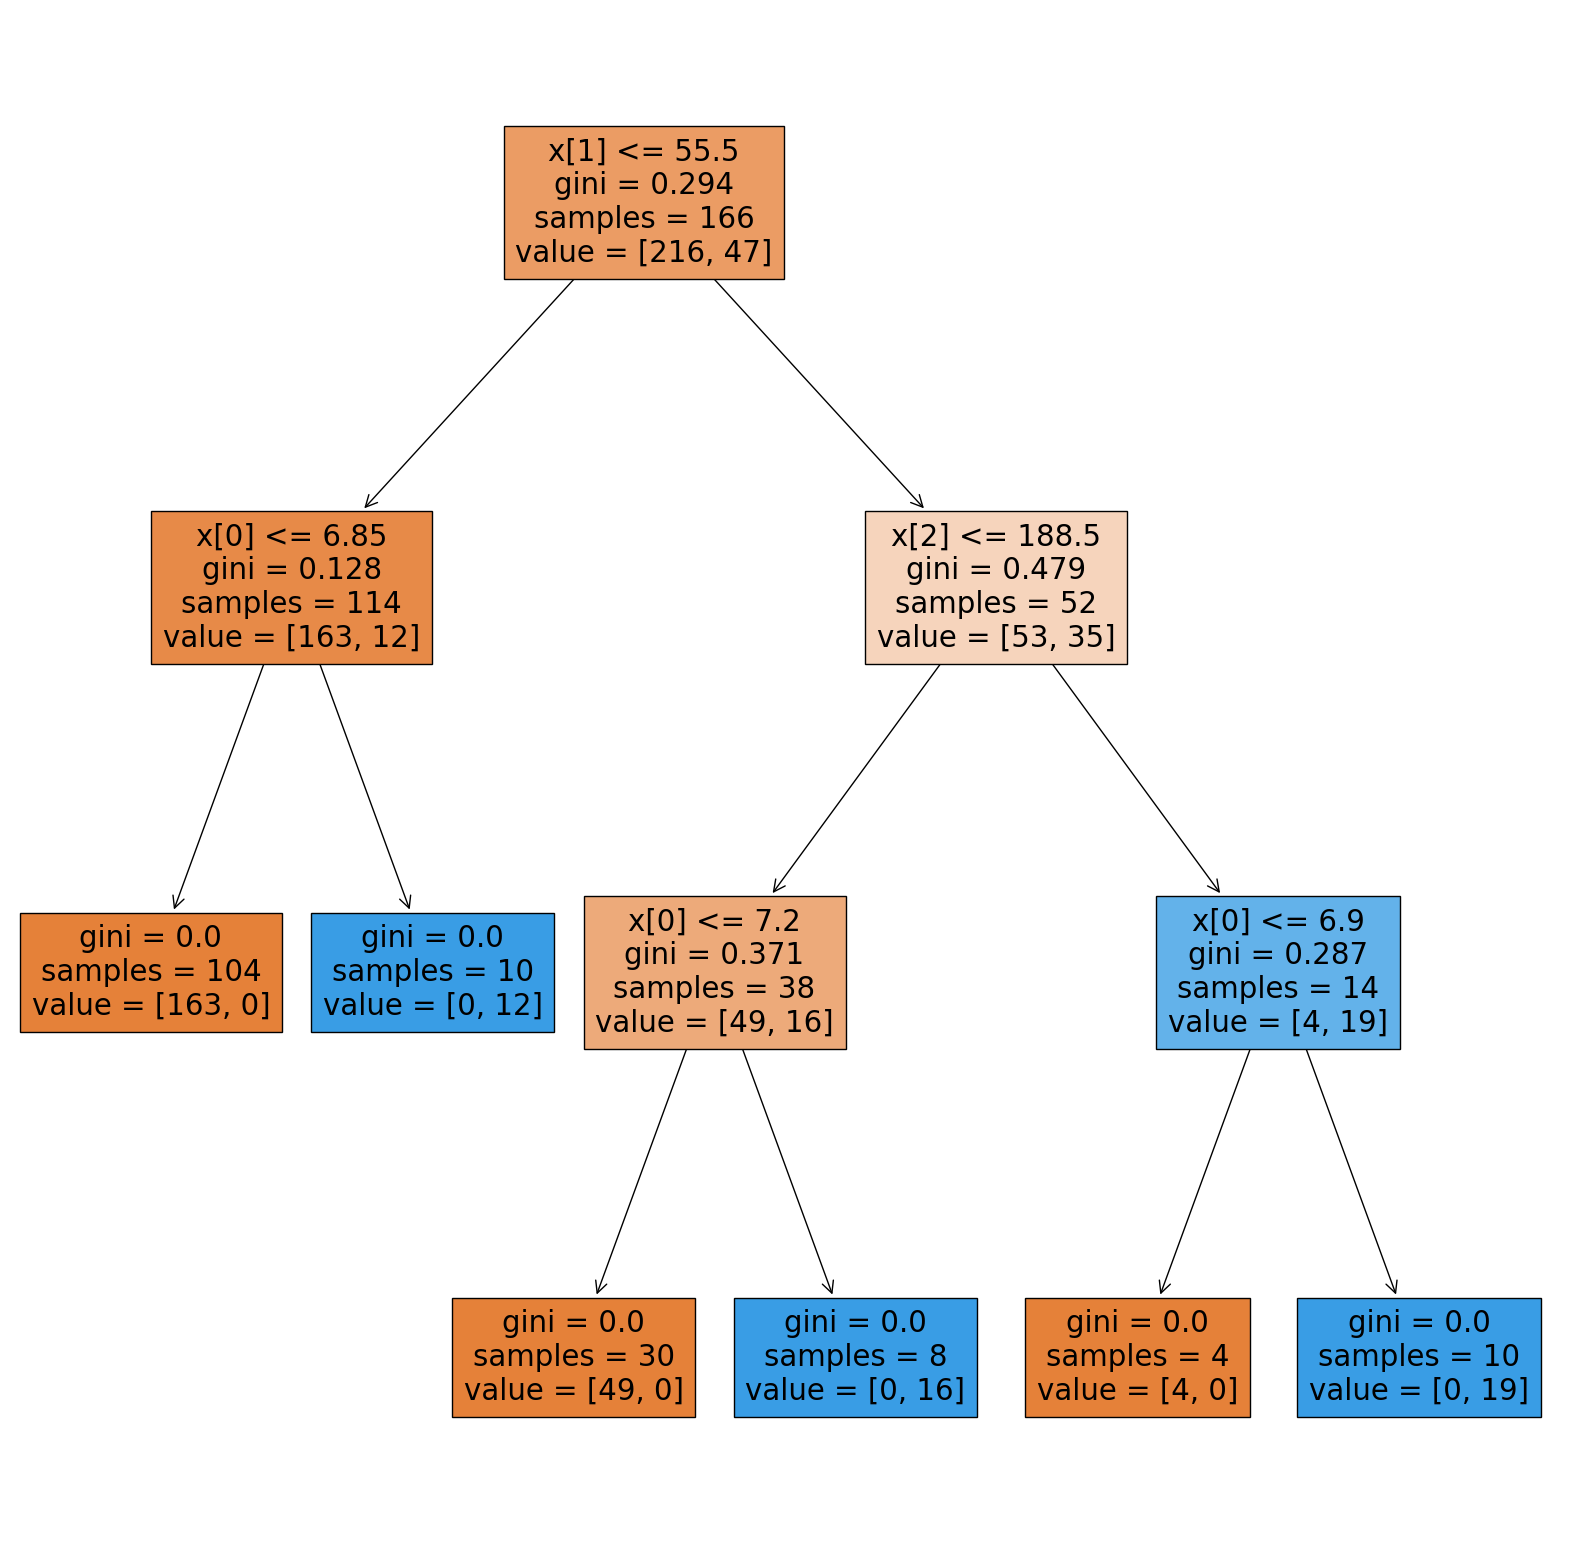

In [93]:
from sklearn import tree
X=data[["A1c","age","weight"]]
y=data["diabetes"]
plt.figure(figsize=(20,20))
_=tree.plot_tree(rf.estimators_[0], filled=True)

**Interpretation:** The plot represents a random forest graph  that splits data points at different levels based on conditions applied to features(A1c, Age, and Weight). Each node shows a decision split, where the tree chooses a threshold on a specific feature to separate the data.The root node split in the tree, chosen based on the age feature (denoted as x[1]). This suggests that age is an influential factor in predicting diabetes. The threshold is age=55.5, with a Gini impurity of 0.294. The leaf nodes represent final predictions made by the tree. For example, one leaf node has gini = 0.0, samples = 10, and value = [0, 12], indicating that all samples in this node are diabetic cases. This decision tree plot illustrates how the Random Forest model separates individuals based on age, A1c, and weight, identifying regions in the feature space that are more likely to contain diabetic or non-diabetic cases. The purity of many nodes (Gini = 0.0) indicates the tree has a strong discriminative ability. 

**Conclusion:** 
- The random forest classifier is the most effective method for our diabetes dataset due to its high accuracy, excellent class balance, and superior performance in predicting both diabetic and non-diabetic classes. Random forest classifier performed the best with an accuracy of 99.12% and excellent metrics for precision, recall, and F1 scores for both diabetic and non-diabetic classes, making it reliable and robust.
- Naive Bayes classifier also performed well, with a test accuracy of 98.68%. Its generalization capability is strong, suggesting that it is well- suited for this dataset. However, its accuracy is slightly lower compared to the random forest model, and it doesn’t handle class imbalance effectively.
Support Vector Machine with RBF kernel achieved 100% accuracy and performs very well on this dataset. While the accuracy is perfect, the model’s potential overfitting to training data may make it less practical compared to Random forest, which balances simplicity, interpretability, and accuracy. - KNN exhibits overfitting, with 100% training accuracy but slightly lower test accuracy(96.05%). The gap indicates it may not generalize as effectively to new data, making it less favorable compared to Random forest or Naive Bayes.
- Logistic regression has a low accuracy in identifying diabetic cases, likely due to class imbalance or limited features. This makes it unsuitable as a primary choice for this dataset.
- Linear SVC and polynomial kernel SVC achieve high accuracies(96% and 98% respectively) but are still slightly outperformed by the Random forest classifier in terms of overall effectiveness and balance between precision and recall.